In [1]:
from blimp.preprocessing.operetta_parse_metadata import (get_image_metadata,
                                                         get_plate_metadata)
from blimp.preprocessing.operetta_to_ome_tiff import (_aggregate_TCZ_metadata,
                                                      _read_images_single_site)

/srv/scratch/z3532965/anaconda3/envs/berrylab-default/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/srv/scratch/z3532965/anaconda3/envs/berrylab-default/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(
13-Jan-23 14:37:41 - bfio.backends - WARNING  - Java backend is not available. This could be due to a missing dependency (jpype).


In [2]:
from pathlib import Path

in_path = Path(
    "/srv/scratch/berrylab/z3532965/operetta_cls/20220823_PABPN1_PABPC1_clones/Images/"
)

In [3]:
get_plate_metadata(in_path / "Index.idx.xml", out_file="/srv/scratch/z3532965/tmp.csv")
# get_image_metadata(in_path / "Index.idx.xml", out_file = "/srv/scratch/z3532965/tmp.csv")

,PlateID,MeasurementID,MeasurementStartTime,Name,PlateTypeName,PlateRows,PlateColumns,Well
0,20220823_PABPN1_PABPC1_clones_20X,1469ff41-111f-4ea7-bf5b-2f83817594e5,2022-08-23T13:25:48.4491098+10:00,20220823_PABPN1_PABPC1_clones_20X,96 Greiner PS 655090,8,12,None


In [7]:
image_metadata = get_image_metadata(in_path / "Index.idx.xml")

None


In [9]:
image_metadata.columns

Index(['id', 'State', 'URL', 'Row', 'Col', 'FieldID', 'PlaneID', 'TimepointID',
       'ChannelID', 'FlimID', 'ChannelName', 'ImageType', 'AcquisitionType',
       'IlluminationType', 'ChannelType', 'ImageResolutionX',
       'ImageResolutionY', 'ImageSizeX', 'ImageSizeY', 'BinningX', 'BinningY',
       'MaxIntensity', 'CameraType', 'PositionX', 'PositionY', 'PositionZ',
       'AbsPositionZ', 'MeasurementTimeOffset', 'AbsTime',
       'MainExcitationWavelength', 'MainEmissionWavelength',
       'ObjectiveMagnification', 'ObjectiveNA', 'ExposureTime',
       'OrientationMatrix', 'StandardFieldID', 'WellName'],
      dtype='object')

In [11]:
image_metadata.query("PlaneID==1 & ChannelID==1 & Row==1 & Col==2")[["id","URL","PositionX","PositionY","StandardFieldID","FieldID"]]

,id,URL,PositionX,PositionY,StandardFieldID,FieldID
432,0102K1F1P1R1,r01c02f01p01-ch1sk1fk1fl1.tiff,0.000000,-0.000646,2,1
468,0102K1F2P1R1,r01c02f02p01-ch1sk1fk1fl1.tiff,-0.000646,-0.000646,1,2
504,0102K1F3P1R1,r01c02f03p01-ch1sk1fk1fl1.tiff,0.000646,-0.000646,3,3
540,0102K1F4P1R1,r01c02f04p01-ch1sk1fk1fl1.tiff,0.001292,-0.000646,4,4
576,0102K1F5P1R1,r01c02f05p01-ch1sk1fk1fl1.tiff,0.001292,-0.001292,8,5
612,0102K1F6P1R1,r01c02f06p01-ch1sk1fk1fl1.tiff,0.000646,-0.001292,7,6
648,0102K1F7P1R1,r01c02f07p01-ch1sk1fk1fl1.tiff,0.000000,-0.001292,6,7
684,0102K1F8P1R1,r01c02f08p01-ch1sk1fk1fl1.tiff,-0.000646,-0.001292,5,8
720,0102K1F9P1R1,r01c02f09p01-ch1sk1fk1fl1.tiff,-0.000646,-0.001937,9,9
756,0102K1F10P1R1,r01c02f10p01-ch1sk1fk1fl1.tiff,0.000000,-0.001937,10,10


In [ ]:
image_metadata[["Row", "Col", "StandardFieldID"]].drop_duplicates()

In [ ]:
from blimp.preprocessing.operetta_to_ome_tiff import _get_metadata_batch

_get_metadata_batch(image_metadata, 0, 120)

In [ ]:
from pathlib import Path

in_path = Path(
    "/srv/scratch/berrylab/z3532965/operetta_cls/20220515_LiveCellOptim/40x_eGFP_400ms_100pc_Cy5_100ms_50pc_multiwell__2022-06-15T12_39_14/Images"
)
out_path = Path(
    "/srv/scratch/berrylab/z3532965/operetta_cls/20220515_LiveCellOptim/40x_eGFP_400ms_100pc_Cy5_100ms_50pc_multiwell__2022-06-15T12_39_14/OME-TIFF"
)

# operetta_to_ome_tiff(in_path,
#                     out_path,
#                     metadata_file="Index.idx.xml",
#                     n_batches=10,
#                     batch_id=0,
#                     mip=True)

In [ ]:
_aggregate_TCZ_metadata(image_metadata, mip=True).query(
    "Row==" + str(4) + " & Col==" + str(3) + "& StandardFieldID==" + str(1)
).URL

In [ ]:
# get average absolute time for each unique imaging site
average_AbsTime = image_metadata.groupby(["Row", "Col", "FieldID", "TimepointID"])[
    "AbsTime"
].mean()
image_metadata_no_z = image_metadata.query("PlaneID==1 & ChannelID==1").drop(
    labels=[
        "ChannelID",
        "ChannelName",
        "ChannelType",
        "MainExcitationWavelength",
        "MainEmissionWavelength",
        "AbsTime",
        "AbsPositionZ",
        "PositionZ",
        "PlaneID",
    ],
    axis=1,
)

In [ ]:
n_z_planes = image_metadata.groupby(["Row", "Col", "FieldID", "TimepointID"])[
    "id"
].count()
n_z_planes.name = "nZ"
n_channels = image_metadata.groupby(["Row", "Col", "FieldID", "TimepointID"])[
    "ChannelID"
].max()
n_channels.name = "nC"

In [ ]:
n_z_planes.shape

In [ ]:
image_metadata_no_z.merge(average_AbsTime, on=["Row", "Col", "FieldID", "TimepointID"])

In [ ]:
import pandas as pd

pd.merge(
    image_metadata_no_z,
    average_AbsTime,
    on=["Row", "Col", "FieldID", "TimepointID"],
    how="left",
)

In [ ]:
OPERETTA_REGEX = r"r(?P<Row>\d+)c(?P<Col>\d+)f(?P<FieldID>\d+)p(?P<PlaneID>\d+)-ch(?P<ChannelID>\d+)sk(?P<TimepointID>\d+)(?P<End>fk\d+fl\d+)"

In [ ]:
import re

p = re.compile(OPERETTA_REGEX)


def _remove_TCZ_filename(pattern, filename, mip=False):
    m = pattern.match(filename)
    new_filename = (
        "r"
        + m.group("Row")
        + "c"
        + m.group("Col")
        + "f"
        + m.group("FieldID")
        + "-"
        + m.group("End")
    )
    if mip:
        new_filename += "-mip.ome.tiff"
    else:
        new_filename += ".ome.tiff"
    return new_filename


filename = "r07c06f03p01-ch1sk1fk1fl1.tiff"
_remove_TCZ_filename(p, filename, mip=True)

In [ ]:
p = re.compile("(a)b")
m = p.match("ab")
m.group()

In [ ]:
images = _read_images_single_site(in_path, image_metadata, 3, 2, 1, 1, 0)

In [ ]:
import numpy as np

np.concatenate([img.data for img in images], axis=2).max(axis=2, keepdims=True).shape

In [ ]:
import numpy as np

# get unique sites
timepoints = image_metadata[["TimepointID"]].drop_duplicates()
sites = image_metadata[["Row", "Col", "StandardFieldID"]].drop_duplicates()[:1]
channels = image_metadata[["ChannelID"]].drop_duplicates()

for site_index, site in sites.iterrows():
    multi_timepoint_img = []
    for timepoint_index, timepoint in timepoints.iterrows():
        multi_channel_img = []
        for channel_index, channel in channels.iterrows():
            imgs = read_images_single_site(
                in_path,
                image_metadata,
                site.Row,
                site.Col,
                site.StandardFieldID,
                channel.ChannelID,
                timepoint.TimepointID,
            )
            # combine z-planes (axis 2)
            multi_channel_img.append(np.concatenate([img.data for img in imgs], axis=2))
        # combine channels (axis 1)
        multi_timepoint_img.append(np.concatenate(multi_channel_img, axis=1))
    # combine timepoints (axis 0)
    multi_timepoint_img = np.concatenate(multi_timepoint_img, axis=0)

In [ ]:
image_metadata[["ChannelID"]].drop_duplicates()

In [ ]:
sites = image_metadata[["Row", "Col", "StandardFieldID"]].drop_duplicates()

In [ ]:
sites

In [ ]:
multi_timepoint_img.shape

In [ ]:
query = (
    "Row=="
    + str(3)
    + " & Col=="
    + str(3)
    + " & StandardFieldID=="
    + str(1)
    + " & ChannelID=="
    + str(1)
    + " & TimepointID=="
    + str(0)
)

xyz = image_metadata.query(query)[
    ["ImageResolutionX", "ImageResolutionY", "AbsPositionZ"]
].drop_duplicates()

# image_resolution_x = xyz.ImageResolutionX[0]
# image_resolution_y = xyz.ImageResolutionY[0]
# image_resolution_z = (xyz.AbsPositionZ.max() - xyz.AbsPositionZ.min()) / (xyz.shape[0]-1)

In [ ]:
xyz.ImageResolutionX.iloc[1]

In [ ]:
z_resolution = get_zyx_resolution(image_metadata, 3, 3, 1, 1, 0)

In [ ]:
z_resolution

In [ ]:
from aicsimageio.writers import OmeTiffWriter

# List of strings representing the names of the data channels
channel_names = (
    image_metadata[["ChannelID", "ChannelName"]]
    .drop_duplicates()
    .sort_values(by=["ChannelID"])
    .ChannelName.tolist()
)

In [ ]:
zyx = get_zyx_resolution(image_metadata, 3, 3, 1, 1, 0)
OmeTiffWriter.save(
    data=multi_timepoint_img,
    uri="file.ome.tif",
    dim_order="TCZYX",
    channel_names=channel_names,
    physical_pixel_sizes=z_resolution,
    parser="lxml",
)

In [ ]:
[np.uint16, np.uint8, np.uint16, np.uint16, np.uint16]

In [ ]:
zyx = get_zyx_resolution(image_metadata, 3, 3, 1, 1, 0)

In [ ]:
filename_list = (
    image_metadata.sort_values(
        by=["TimepointID", "ChannelID", "Row", "Col", "StandardFieldID", "AbsPositionZ"]
    )
    .query(query)
    .URL.tolist()
)

In [12]:
from pathlib import Path

# Check stitching using standard field ids
from aicsimageio import AICSImage

mip_path = in_path.parent / "OME-TIFF-MIP"

In [13]:
image_metadata_mip = _aggregate_TCZ_metadata(image_metadata, mip=True)

In [14]:
image_metadata_mip.columns

Index(['id', 'State', 'URL', 'Row', 'Col', 'FieldID', 'TimepointID', 'FlimID',
       'ImageType', 'AcquisitionType', 'IlluminationType', 'ImageResolutionX',
       'ImageResolutionY', 'ImageSizeX', 'ImageSizeY', 'BinningX', 'BinningY',
       'MaxIntensity', 'CameraType', 'PositionX', 'PositionY',
       'MeasurementTimeOffset', 'ObjectiveMagnification', 'ObjectiveNA',
       'ExposureTime', 'OrientationMatrix', 'StandardFieldID', 'WellName',
       'AbsTime', 'NChannels', 'NPlanes'],
      dtype='object')

In [16]:
image_metadata_mip_subset = (
    image_metadata_mip.sort_values(by=["FieldID"])
    .query("Row == 1 & Col == 2")[
        ["Row", "Col", "FieldID", "StandardFieldID", "URL", "PositionX", "PositionY"]
    ]
    .drop_duplicates()
)
image_metadata_mip_subset

,Row,Col,FieldID,StandardFieldID,URL,PositionX,PositionY
12,1,2,1,2,r01c02f01-fk1fl1-mip.ome.tiff,0.000000,-0.000646
13,1,2,2,1,r01c02f02-fk1fl1-mip.ome.tiff,-0.000646,-0.000646
14,1,2,3,3,r01c02f03-fk1fl1-mip.ome.tiff,0.000646,-0.000646
15,1,2,4,4,r01c02f04-fk1fl1-mip.ome.tiff,0.001292,-0.000646
16,1,2,5,8,r01c02f05-fk1fl1-mip.ome.tiff,0.001292,-0.001292
17,1,2,6,7,r01c02f06-fk1fl1-mip.ome.tiff,0.000646,-0.001292
18,1,2,7,6,r01c02f07-fk1fl1-mip.ome.tiff,0.000000,-0.001292
19,1,2,8,5,r01c02f08-fk1fl1-mip.ome.tiff,-0.000646,-0.001292
20,1,2,9,9,r01c02f09-fk1fl1-mip.ome.tiff,-0.000646,-0.001937
21,1,2,10,10,r01c02f10-fk1fl1-mip.ome.tiff,0.000000,-0.001937


In [17]:
image_files = image_metadata_mip_subset.URL.to_list()
images = [AICSImage(mip_path / f) for f in image_files]
standard_field_id_mapping = image_metadata_mip_subset[
    ["FieldID", "StandardFieldID"]
].drop_duplicates()
field_id_to_standard_field_id = standard_field_id_mapping.set_index(
    "FieldID"
).T.to_dict("index")["StandardFieldID"]
field_id_to_standard_field_id

/srv/scratch/z3532965/anaconda3/envs/berrylab-default/lib/python3.8/site-packages/ome_types/_convenience.py:105: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


{1: 2, 2: 1, 3: 3, 4: 4, 5: 8, 6: 7, 7: 6, 8: 5, 9: 9, 10: 10, 11: 11, 12: 12}

In [30]:
import numpy as np

new_order = [int(s) for s in field_id_to_standard_field_id.values()]
images_reorder = [images[i - 1] for i in new_order]
stitched_array = np.vstack(
    [
        np.hstack(
            [
                images_reorder[i + 4 * j].get_image_data("YX", T=0, C=0)
                for i in range(0, 4)
            ]
        )
        for j in range(0, 3)
    ]
)

In [31]:
[[i + 4*j for i in range(0,4)] for j in range(0,3)]

[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]]

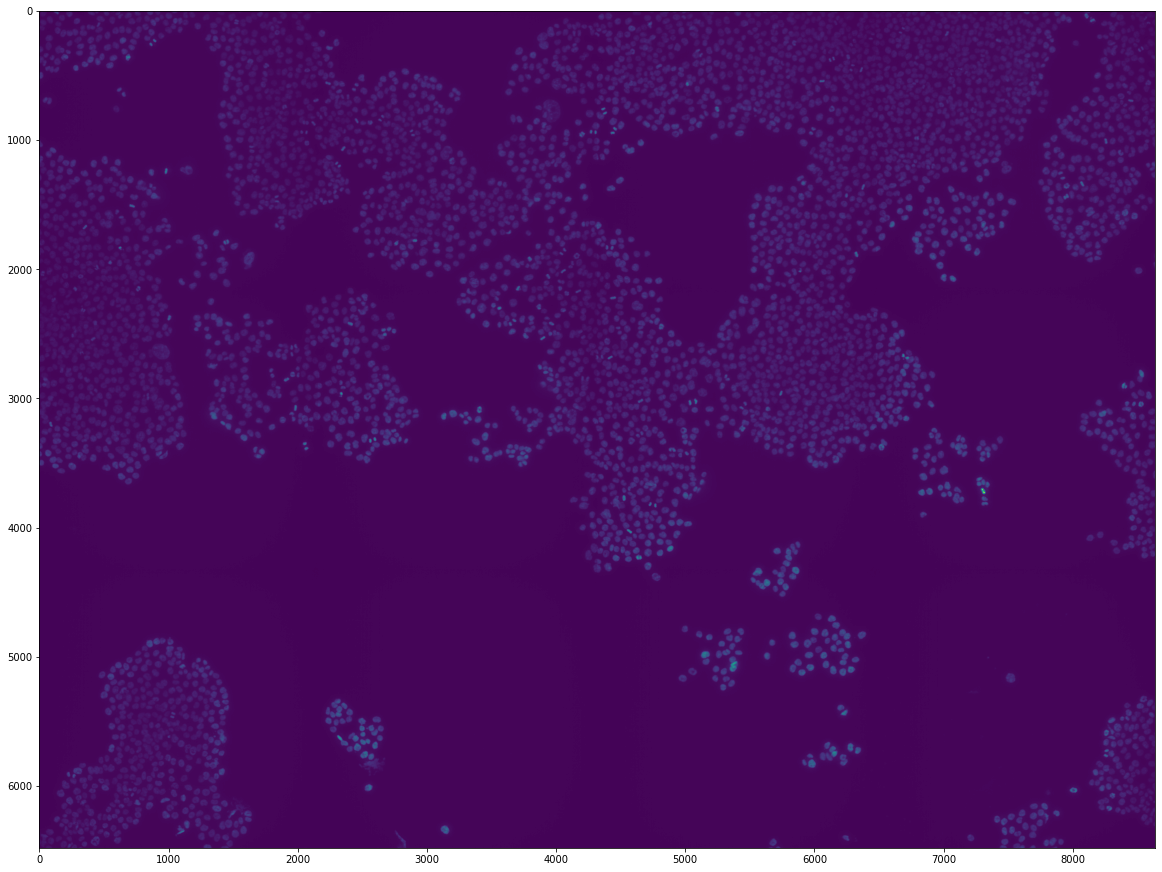

In [32]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
plt.imshow(stitched_array)
plt.show()